<a href="https://colab.research.google.com/github/delafarahita/PCVK_Ganjil_2024/blob/main/Dela_Farahita_Zain_Modul_9_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nama: Dela Farahita Zain
# NIM: 2241720058
# Kelas: D4-TI / 3B

1. Import folder yang ada di Drive

In [16]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2.  Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-6 berikut

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar morphology.png)

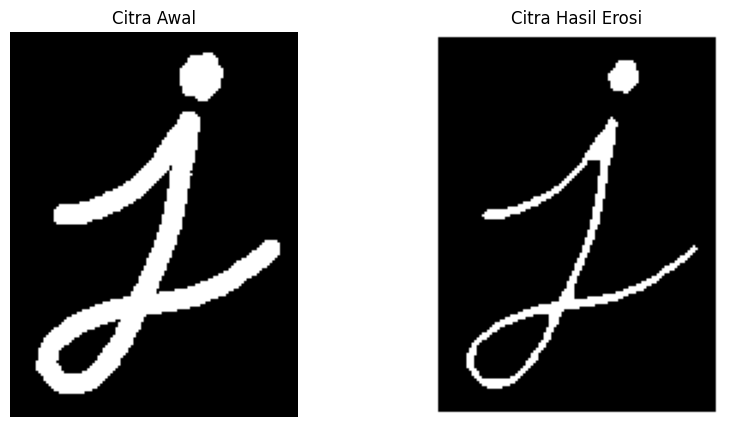

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def erode(image):
    # Membuat salinan dari citra untuk menyimpan hasil erosi
    eroded_image = np.ones_like(image)

    # Mendefinisikan structuring element square 5x5
    se = np.ones((5, 5), dtype=int)

    # Mendapatkan ukuran citra
    rows, cols = image.shape

    # Melakukan erosi
    for i in range(2, rows - 2):
        for j in range(2, cols - 2):
            # Mengecek apakah semua piksel dalam jendela 5x5 adalah 1
            if np.array_equal(image[i - 2:i + 3, j - 2:j + 3], se):
                eroded_image[i, j] = 1
            else:
                eroded_image[i, j] = 0

    return eroded_image

# Membaca citra input (gambar j.png)
image = plt.imread('/content/drive/MyDrive/PCVK_Ganjil_2024/Modul9/j.png')

# Jika citra memiliki 3 channel (citra RGB), konversikan menjadi grayscale
if len(image.shape) == 3:
    image = np.mean(image, axis=2)  # Mengonversi citra RGB menjadi grayscale

# Mengubah citra grayscale menjadi biner
image = np.where(image > 0.5, 1, 0)  # Ambang batas 0.5 untuk mengubah menjadi biner

# Melakukan erosi
result = erode(image)

# Menampilkan citra asli dan citra hasil erosi
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Citra Awal')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Citra Hasil Erosi')
plt.imshow(result, cmap='gray')
plt.axis('off')

plt.show()


4. Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED) berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar morphology.png, dan cetak Structuring Element-nya)

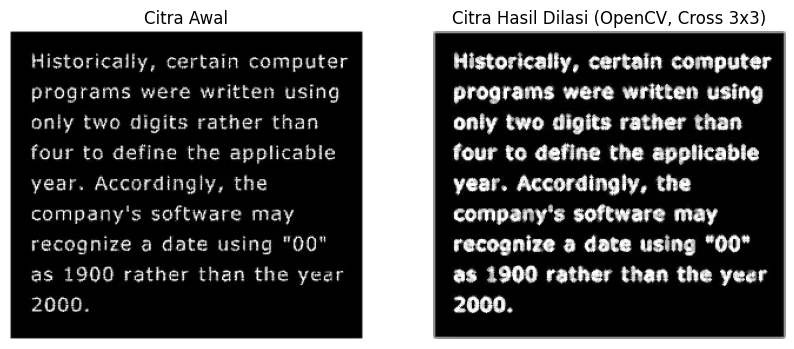

Structuring Element (Cross 3x3):
 [[0 1 0]
 [1 1 1]
 [0 1 0]]


In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca citra input
image = cv2.imread('/content/drive/MyDrive/PCVK_Ganjil_2024/Modul9/morphology.png', 0)

# Mendefinisikan structuring element cross 3x3
se = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

# Melakukan dilasi dengan OpenCV
dilated_image = cv2.dilate(image, se)

# Menampilkan citra asli dan citra hasil dilasi
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Citra Awal')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Citra Hasil Dilasi (OpenCV, Cross 3x3)')
plt.imshow(dilated_image, cmap='gray')
plt.axis('off')

plt.show()

# Mencetak Structuring Element
print("Structuring Element (Cross 3x3):\n", se)


5. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

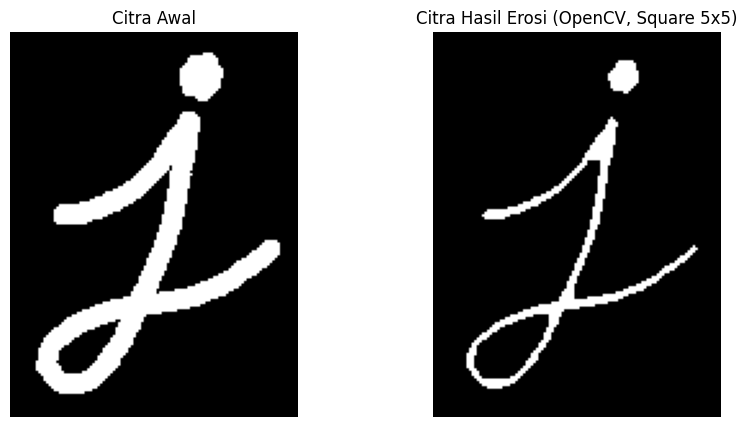

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca citra input
image = cv2.imread('/content/drive/MyDrive/PCVK_Ganjil_2024/Modul9/j.png', 0)

# Mendefinisikan structuring element square 5x5
se = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

# Melakukan erosi dengan OpenCV
eroded_image = cv2.erode(image, se)

# Menampilkan citra asli dan citra hasil erosi
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Citra Awal')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Citra Hasil Erosi (OpenCV, Square 5x5)')
plt.imshow(eroded_image, cmap='gray')
plt.axis('off')

plt.show()


6. Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

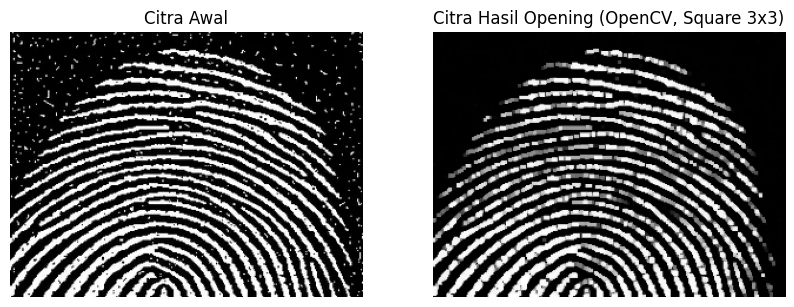

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca citra input
image = cv2.imread('/content/drive/MyDrive/PCVK_Ganjil_2024/Modul9/fingerprint.png', 0)

# Mendefinisikan structuring element square 3x3
se = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Melakukan operasi opening (erosi diikuti dilasi)
opened_image = cv2.morphologyEx(image, cv2.MORPH_OPEN, se)

# Menampilkan citra asli dan citra hasil opening
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Citra Awal')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Citra Hasil Opening (OpenCV, Square 3x3)')
plt.imshow(opened_image, cmap='gray')
plt.axis('off')

plt.show()


7. Buatlah program implementasi operasi opening dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar fingerprint.png)

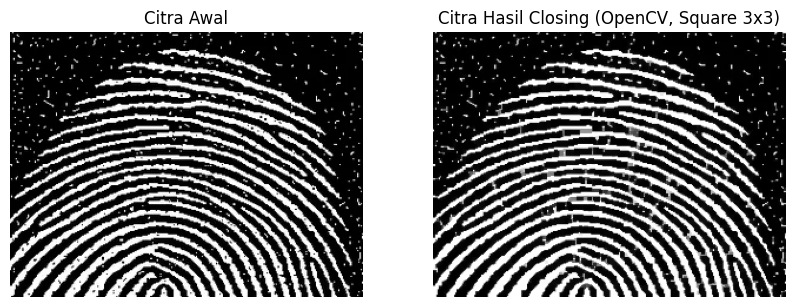

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca citra input
image = cv2.imread('/content/drive/MyDrive/PCVK_Ganjil_2024/Modul9/fingerprint.png', 0)

# Mendefinisikan structuring element square 3x3
se = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Melakukan operasi closing (dilasi diikuti erosi)
closed_image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, se)

# Menampilkan citra asli dan citra hasil closing
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Citra Awal')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Citra Hasil Closing (OpenCV, Square 3x3)')
plt.imshow(closed_image, cmap='gray')
plt.axis('off')

plt.show()


8. Buatlah program implementasi operasi closing dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar fingerprint.png)

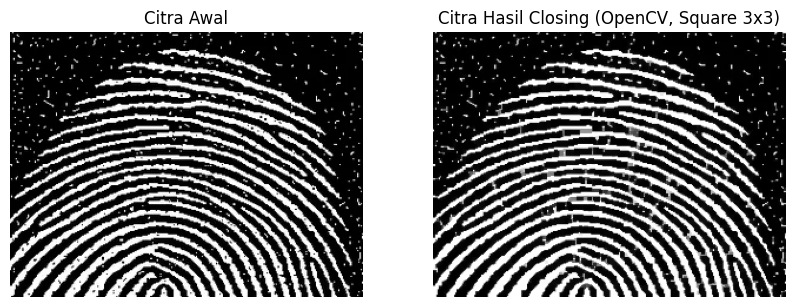

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca citra input
image = cv2.imread('/content/drive/MyDrive/PCVK_Ganjil_2024/Modul9/fingerprint.png', 0)

# Mendefinisikan structuring element square 3x3
se = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Melakukan operasi closing (dilasi diikuti erosi)
closed_image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, se)

# Menampilkan citra asli dan citra hasil closing
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Citra Awal')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Citra Hasil Closing (OpenCV, Square 3x3)')
plt.imshow(closed_image, cmap='gray')
plt.axis('off')

plt.show()


9. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Cross 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

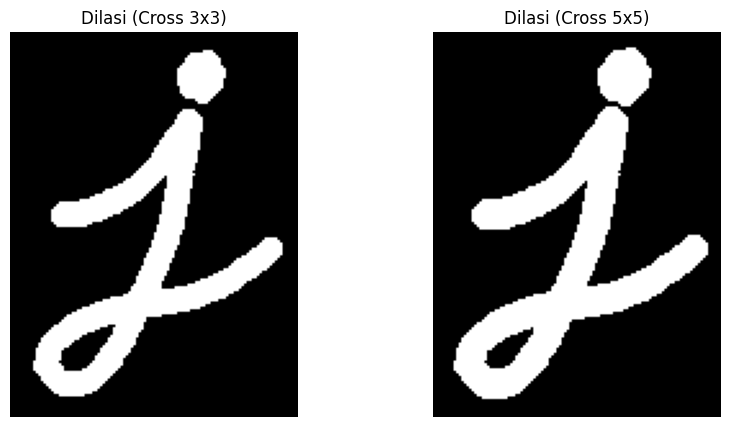

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca citra input
image = cv2.imread('/content/drive/MyDrive/PCVK_Ganjil_2024/Modul9/j.png', 0)

# Mendefinisikan structuring element cross 3x3 dan 5x5
se_3x3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
se_5x5 = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))

# Melakukan dilasi
dilated_image_3x3 = cv2.dilate(image, se_3x3)
dilated_image_5x5 = cv2.dilate(image, se_5x5)

# Menampilkan hasil dilasi
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Dilasi (Cross 3x3)')
plt.imshow(dilated_image_3x3, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Dilasi (Cross 5x5)')
plt.imshow(dilated_image_5x5, cmap='gray')
plt.axis('off')

plt.show()


10. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Circular 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

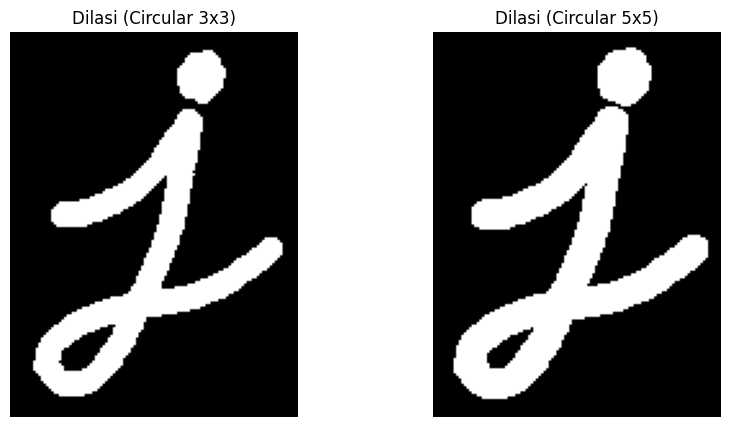

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca citra input
image = cv2.imread('/content/drive/MyDrive/PCVK_Ganjil_2024/Modul9/j.png', 0)

# Mendefinisikan structuring element circular 3x3 dan 5x5
se_circular_3x3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
se_circular_5x5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

# Melakukan dilasi
dilated_image_circular_3x3 = cv2.dilate(image, se_circular_3x3)
dilated_image_circular_5x5 = cv2.dilate(image, se_circular_5x5)

# Menampilkan hasil dilasi
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Dilasi (Circular 3x3)')
plt.imshow(dilated_image_circular_3x3, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Dilasi (Circular 5x5)')
plt.imshow(dilated_image_circular_5x5, cmap='gray')
plt.axis('off')

plt.show()


11.  Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Rectangle 3 x 5 dan 5 x 7, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

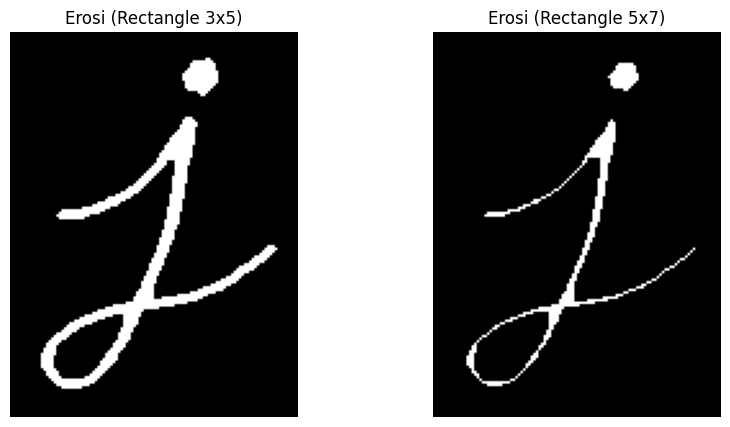

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca citra input
image = cv2.imread('/content/drive/MyDrive/PCVK_Ganjil_2024/Modul9/j.png', 0)

# Mendefinisikan structuring element rectangle 3x5 dan 5x7
se_rect_3x5 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 5))
se_rect_5x7 = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 7))

# Melakukan erosi
eroded_image_rect_3x5 = cv2.erode(image, se_rect_3x5)
eroded_image_rect_5x7 = cv2.erode(image, se_rect_5x7)

# Menampilkan hasil erosi
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Erosi (Rectangle 3x5)')
plt.imshow(eroded_image_rect_3x5, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Erosi (Rectangle 5x7)')
plt.imshow(eroded_image_rect_5x7, cmap='gray')
plt.axis('off')

plt.show()


12. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

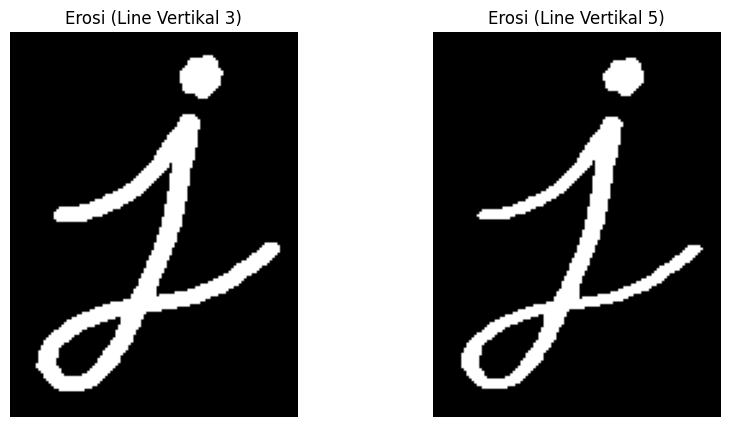

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca citra input
image = cv2.imread('/content/drive/MyDrive/PCVK_Ganjil_2024/Modul9/j.png', 0)

# Mendefinisikan structuring element line vertikal 3 dan 5
se_line_vertical_3 = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 3))
se_line_vertical_5 = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 5))

# Melakukan erosi
eroded_image_line_3 = cv2.erode(image, se_line_vertical_3)
eroded_image_line_5 = cv2.erode(image, se_line_vertical_5)

# Menampilkan hasil erosi
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Erosi (Line Vertikal 3)')
plt.imshow(eroded_image_line_3, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Erosi (Line Vertikal 5)')
plt.imshow(eroded_image_line_5, cmap='gray')
plt.axis('off')

plt.show()
